### Imports Necesarios

In [319]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns

### Introducción

### Importamos el Dataset y lo pasamos a Dataframe

In [320]:
# Install dependencies as needed:
#!pip install kagglehub[pandas-datasets]
# Set the path to the file you'd like to load
file_path = "Datos.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fjcob1/idealista-madrid",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

display("Primeros 5 registros:", df.head())

'Primeros 5 registros:'

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


### Introducción de los Datos
* provincia: Provincia
* zona: zona
* título: Breve descripción de la oferta.
* PrecioActual: Precio de venta actual.
* PrecioAnterior: Precio de la oferta anterior.
* metros: metros cuadrados.
* habitaciones: número de habitaciones.
* ascensor: si se indica que tenga o no ascensor.
* localización: Interior, exterior,…
* planta: número de planta.
* baños: número de baños.
* tags: etiquetas relevantes dependiendo de lo indicado en la oferta.
* descripción: descripción de la oferta de venta.
* Enlace: enlace a la oferta.

### Vemos el tipo de dato de los campos

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


### Vemos cuantos valores únicos hay de la columna provincia para asegurarnos antes de borrarla

In [322]:
df['provincia'].unique()

array(['madrid'], dtype=object)

### Vemos cuantos valores "0" hay de la columna PrecioAnterior para asegurarnos antes de borrarla

In [323]:
total_registros = len(df)

valores_cero = (df['PrecioAnterior'] == 0).sum()

print(f"Total de registros: {total_registros}")
print(f"Valores iguales a 0 en 'PrecioAnterior': {valores_cero}")

Total de registros: 11826
Valores iguales a 0 en 'PrecioAnterior': 10713


### Nuestra variable objetivo va a ser el PrecioActual de la vivienda y de momento vamos a eliminar las columnas que no son relevantes para nuetro modelo:
* provincia
* PrecioAnterior
* Enlace (no aporta nada), pero no lo vamos a borrar para comprobar la calidad y veracidad de los datos mas adelante

In [324]:
try:
    df.drop(columns=['provincia', 'PrecioAnterior',], inplace=True)
    print("Columnas eliminadas correctamente.")
except KeyError as e:
    print(f"No se pudieron eliminar algunas columnas porque no existen(ya se han eliminado): {e}")
display(df.head())

Columnas eliminadas correctamente.


,zona,titulo,PrecioActual,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


## 1. Preparación por columnas de nuestro dataset

In [325]:
# Vamos a poner el PrecioActual como la primera columna
df = df[['PrecioActual'] + [col for col in df.columns if col != 'PrecioActual']]
display(df.head())

,PrecioActual,zona,titulo,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,355000,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,149000,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,195000,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,195000,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,715000,tetuan,"Dúplex en Bellas Vistas, Madrid",140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


### Funcion que vamos a usar para analizar las columnas

In [326]:
# En primer lugar vamos definir una función que nos ayudará a analizar las columnas de un dataframe
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, ':',v, "veces")

## *Columna zona*

### Usamos la funcion describe_columna para comprobar si hay nulos, los número de valores distintos y comprobar los valores mas frecuentes

In [327]:
describe_columna(df, "zona")

Columna: zona  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 21
Valores más frecuentes:
barrio-de-salamanca : 2018 veces
centro : 1890 veces
chamberi : 796 veces
chamartin : 706 veces
tetuan : 596 veces
moncloa : 580 veces
carabanchel : 567 veces
ciudad-lineal : 537 veces
puente-de-vallecas : 526 veces
retiro : 508 veces


### nos puede valer para tener en cuenta a la hora de escalar los datos en los siguientes pasos

### zona enfrentado al PrecioActual

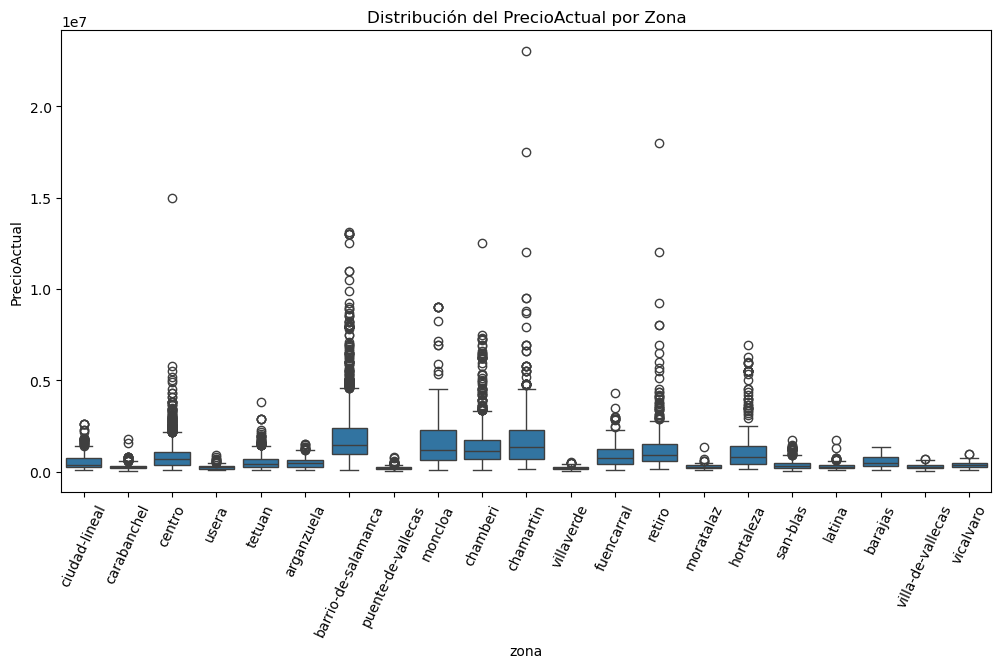

In [328]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="zona", y="PrecioActual", data=df)
plt.xticks(rotation=65)  # Rotar etiquetas para mejor lectura
plt.title("Distribución del PrecioActual por Zona")
plt.show()

### media de precio de vivienda por zonas

In [329]:
media_precio_por_zona = df.groupby("zona")["PrecioActual"].mean().sort_values(ascending=False)

# Formatear los valores sin notación científica y con separador de miles
media_precio_por_zona = media_precio_por_zona.apply(lambda x: f"{x:.3f}")

display(media_precio_por_zona)

zona
barrio-de-salamanca    1966802.046
chamartin              1767126.296
moncloa                1620871.172
chamberi               1498335.730
retiro                 1310153.789
hortaleza              1190754.570
fuencarral              892204.092
centro                  862305.902
tetuan                  577428.998
barajas                 555625.660
ciudad-lineal           542408.108
arganzuela              484212.350
san-blas                401028.385
vicalvaro               356815.922
latina                  299185.233
villa-de-vallecas       298188.288
moratalaz               296772.155
carabanchel             273038.078
usera                   252341.970
villaverde              198630.583
puente-de-vallecas      191280.369
Name: PrecioActual, dtype: object

### Vemos que hay un amplio rango de precios por zonas, yendonos al extremo, en vallecas tenemos la media entorno a 191.000€ y en el barrio de salamanca en cerca de 2 millones de euros.

## *Columna titulo*
### Vamos a borrarla porque no va a influenciar en el entrenamiento del modelo

In [330]:
try:
    df.drop(columns=['titulo'], inplace=True)
    print("Columna titulo eliminada correctamente.")
except KeyError as e:
    print(f"No se pudo eliminar la columna titulo o ya ha sido eliminada): {e}")
display(df.head())

Columna titulo eliminada correctamente.


,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,355000,ciudad-lineal,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,149000,carabanchel,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,195000,centro,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,195000,usera,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,715000,tetuan,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


## *Columna baños*
### Se ha eliminado la columna baños porque hay mas de un 90% de casos en los que esta columna muestra 0 en los baños, debe de ser un error al extraer los datos de la página de idealista

In [331]:
try:
    total_registros = len(df)

    valores_cero = (df['baños'] == 0).sum()

    print(f"Total de registros: {total_registros}")
    print(f"Valores iguales a 0 en 'baños': {valores_cero}")
    df.drop(columns=['baños'], inplace=True)
    print("Columna baños eliminada correctamente.")
except KeyError as e:
    print(f"No se pudo eliminar la columna baños o ya ha sido eliminada): {e}")

#display(df.head())

Total de registros: 11826
Valores iguales a 0 en 'baños': 9311
Columna baños eliminada correctamente.


## *Columna metros*

In [332]:
# Vemos cuantos nulos hay en el campo metros
print("Nulos en la columna metros:",df["metros"].isnull().sum())

# Hacemos un describe para ver la informacion del campo
df["metros"].describe()

Nulos en la columna metros: 0


count    11826.000000
mean       153.790039
std        766.217750
min         11.000000
25%         68.000000
50%        103.000000
75%        160.000000
max      75000.000000
Name: metros, dtype: float64

### Vemos que puede haber precios muy diferentes aunque la media se establece en 153m², vemos en max que hay una casa en venta con 75000m², vamos a buscarla

In [333]:
registro_maximo = df.loc[df["metros"] == 75000]
display(registro_maximo)

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
6979,192000,ciudad-lineal,75000,3.0,N,EXTERIOR,1ª,"VIVIENDA,INMOBILIARIA",VIVIENDA OCUPADASe admiten ofertas***SIN COMIS...,https://www.idealista.com/inmueble/107196960/


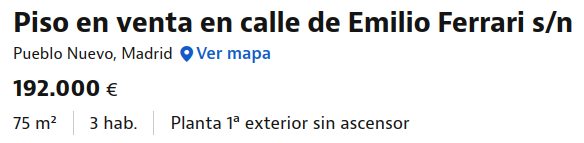

### Entrando en el enlace vemos que no son 75000m², sino 75, entonces vamos a hacer una pequeña funcion para buscar estos posibles casos

In [334]:
# Filtrar los pisos con más de 150 metros cuadrados y menos de 300000 en PrecioActual
df_filtrado = df[(df['metros'] > 150) & (df['PrecioActual'] < 300000)]

# Seleccionar las columnas de interés
df_resultado = df_filtrado[['PrecioActual', 'metros', 'Enlace']]

# Mostrar el resultado
display(df_resultado)

,PrecioActual,metros,Enlace
744,190000,243,https://www.idealista.com/inmueble/107240336/
2714,114500,811,https://www.idealista.com/inmueble/107028561/
3231,170000,160,https://www.idealista.com/inmueble/106315139/
5762,286000,155,https://www.idealista.com/inmueble/107016847/
6979,192000,75000,https://www.idealista.com/inmueble/107196960/
7456,290000,171,https://www.idealista.com/inmueble/102922637/
7750,161000,479,https://www.idealista.com/inmueble/101241888/
8106,286000,154,https://www.idealista.com/inmueble/106631131/
10181,290000,160,https://www.idealista.com/inmueble/107261187/
10821,232000,159,https://www.idealista.com/inmueble/106463321/


| Columna | Precio | Metros | Acción |
|---------|--------|--------|--------|
| 744     | Está bien | Está bien | Se dejará tal como está |
| 2714    | Está bien | 41     | Se cambiará el valor de la columna metros |
| 3231    | Está bien | Está bien | Se dejará tal como está |
| 5762    | Está bien | Está bien | Se dejará tal como está |
| 6979    | Está bien | 75     | Se cambiará el valor de la columna metros |
| 7456    | Está bien | Está bien | Se dejará tal como está |
| 7750    | Está bien | 83     | Se cambiará el valor de la columna metros |
| 8106    | Está bien | Está bien | Se dejará tal como está |
| 10181   | Está bien | Está bien | Se dejará tal como está |
| 10821   | Está bien | Está bien | Se dejará tal como está |

### También vamos a filtrar este caso especial

In [335]:
# Filtrar los pisos con más de 9000 metros cuadrados y menos de 2000000000 en PrecioActual
df_filtrado = df[(df['metros'] > 9000) & (df['PrecioActual'] < 2000000000)]

# Seleccionar las columnas de interés
df_resultado = df_filtrado[['PrecioActual', 'metros', 'Enlace']]

# Mostrar el resultado
display(df_resultado)

,PrecioActual,metros,Enlace
6979,192000,75000,https://www.idealista.com/inmueble/107196960/
7997,1495000,33175,https://www.idealista.com/inmueble/106105382/


### El primero ya lo vimos en las comprobaciones de arriba y el segundo los metros son 332m² no 7997m²

In [336]:
# Lista de los índices y las correcciones a hacer según la tabla de comprobaciones
correcciones = {
    744: None,    # Se dejará tal como está
    2714: 41,     # Se cambiará el valor de la columna metros a 41
    3231: None,   # Se dejará tal como está
    5762: None,   # Se dejará tal como está
    6979: 75,     # Se cambiará el valor de la columna metros a 75
    7456: None,   # Se dejará tal como está
    7750: 83,     # Se cambiará el valor de la columna metros a 83
    8106: None,   # Se dejará tal como está
    10181: None,  # Se dejará tal como está
    10821: None,  # Se dejará tal como está
    7997: 332     # Cambiar el valor de la columna metros a 332 (corrigiendo el error de 33175)
}

# Aplicar las correcciones usando iloc
for indice, metros_nuevos in correcciones.items():
    if metros_nuevos is not None:
        # Actualizamos los metros solo si es necesario
        df.iloc[indice, df.columns.get_loc('metros')] = metros_nuevos

# Mostrar algunas filas para verificar las modificaciones
display(df.iloc[[2714, 6979, 7750, 7997]])  # Verifica las filas modificadas

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
2714,114500,puente-de-vallecas,41,NaN,NaN,NaN,BAJO,"PISO,FUNCIONAL","Funcional piso en Madrid, ideal para parejas. ...",https://www.idealista.com/inmueble/107028561/
6979,192000,ciudad-lineal,75,3.0,N,EXTERIOR,1ª,"VIVIENDA,INMOBILIARIA",VIVIENDA OCUPADASe admiten ofertas***SIN COMIS...,https://www.idealista.com/inmueble/107196960/
7750,161000,puente-de-vallecas,83,3.0,N,NaN,4ª,"VIVIENDA,PISO,LUMINOSO,HOGAR,FUNCIONAL",Presentamos este encantador piso de segunda ma...,https://www.idealista.com/inmueble/101241888/
7997,1495000,hortaleza,332,7.0,NaN,NaN,NaN,"AMPLIO,EXCLUSIVA,OPORTUNIDAD,CHALET,REFORMAR,M...",Este fantástico pareado se encuentra en Piover...,https://www.idealista.com/inmueble/106105382/


## *Columna habitaciones*

### comprobamos los nulos o si está rellenado con 0 habitaciones

In [337]:
describe_columna(df, "habitaciones")

habitaciones0 = (df["habitaciones"] == 0).sum()
print("con el campo habitaciones = 0 -->",habitaciones0)


Columna: habitaciones  -  Tipo de datos: float64
Número de valores nulos: 366  -  Número de valores distintos: 17
Valores más frecuentes:
3.0 : 3768 veces
2.0 : 3383 veces
1.0 : 1624 veces
4.0 : 1490 veces
5.0 : 690 veces
6.0 : 291 veces
7.0 : 102 veces
8.0 : 48 veces
9.0 : 26 veces
10.0 : 15 veces
con el campo habitaciones = 0 --> 0


### Tambien vamos a comprobar si hay muchas habitaciones en una vivienda, por si está mal este campo enfrentandola a un precio menor a 700000

In [338]:
habitacionesraras = df[(df['habitaciones'] >= 7) & (df['PrecioActual'] < 700000)]
display(habitacionesraras)

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
40,128000,san-blas,59,20.0,N,EXTERIOR,BAJO,"VIVIENDA,FINCA",Especial Inversores. Se vende ALQUILADO A TERC...,https://www.idealista.com/inmueble/106562409/
4471,650000,centro,181,7.0,S,EXTERIOR,2ª,"ÁTICO,OPORTUNIDAD",*OPORTUNIDAD PARA INVERSORES EN EL CORAZÓN DE ...,https://www.idealista.com/inmueble/107092719/
5926,450000,chamberi,111,9.0,S,INTERIOR,BAJO,"VIVIENDA,EXCLUSIVA,OPORTUNIDAD","¡ATENCIÓN INVERSORES, OPORTUNIDAD ÚNICA!Se tra...",https://www.idealista.com/inmueble/106936358/
6187,429000,barajas,135,8.0,NaN,NaN,NaN,CASA,VOhome propiedades Barajas vende casa en el Ca...,https://www.idealista.com/inmueble/105171402/
6579,490000,usera,150,9.0,N,EXTERIOR,4ª,"DÚPLEX,FUNCIONAL",¡Descubre este increíble dúplex en venta que r...,https://www.idealista.com/inmueble/107153509/
7661,293000,puente-de-vallecas,124,7.0,N,EXTERIOR,BAJO,"DÚPLEX,AMUEBLADA,ELECTRODOMÉSTICOS",NO COBRAMOS AL COMPRADORDúplex en rentabilidad...,https://www.idealista.com/inmueble/106505862/
11805,650000,centro,134,7.0,N,EXTERIOR,1ª,"PISO,BALCONES,INTERIOR",Se vende sin comisión de agencia piso amueblad...,https://www.idealista.com/inmueble/106907623/


## *Columna planta*
### Hacemos el describe para ver la información y pensar que hacer

In [339]:
describe_columna(df, "planta")

Columna: planta  -  Tipo de datos: object
Número de valores nulos: 1225  -  Número de valores distintos: 27
Valores más frecuentes:
1ª : 2108 veces
2ª : 1779 veces
3ª : 1570 veces
BAJO : 1509 veces
4ª : 1266 veces
5ª : 816 veces
6ª : 574 veces
7ª : 289 veces
ENTREPLANTA : 163 veces
SÓTANO : 128 veces


### Las conclusiones son al final borrar estos registros porque si le incluyo a estos nulos una categoria como "Desconocido" creo que puede influenciar en el calculo del modelo porque parece que va a estar muy ligada al precio de esta columna, y no podemos tener una columna como "Desconocido" que tenga mas valores que muchas otras categorías (1ª, 2ª, 3ª Entreplanta y sótano)

In [340]:
df.dropna(subset=['planta'], inplace=True)

## *Columna ascensor*
### Hacemos el describe para ver la información y pensar que hacer

In [341]:
describe_columna(df, "ascensor")

Columna: ascensor  -  Tipo de datos: object
Número de valores nulos: 55  -  Número de valores distintos: 2
Valores más frecuentes:
S : 8163 veces
N : 2383 veces


### Para no borrar esos 55 datos nulos, podemos rellenar con lo que tenemos claro por la ley 010 que dice que a partir de cinco pisos es obligatorio instalar al menos un ascensor en el edificio y los demás casos estudiarlos

In [349]:
# Filtrar los registros con valores nulos en la columna 'ascensor'
nulos_ascensor = df[df['ascensor'].isna()]

# Contar los nulos en la columna 'ascensor' donde 'planta' es menor o igual a 4ª (opcional)
nulos_bajo_5 = nulos_ascensor[nulos_ascensor['planta'] <= '4ª'].shape[0]

# Contar los nulos en la columna 'ascensor' donde 'planta' es mayor o igual a 5ª (obligatorio tener ascensor)
nulos_arriba_5 = nulos_ascensor[nulos_ascensor['planta'] >= '5ª'].shape[0]

# Mostrar los resultados
print(f"Nulos en 'ascensor' con planta >= 5ª (obligatorio): {nulos_arriba_5}")
print(f"Nulos en 'ascensor' con planta <= 4ª (opcional): {nulos_bajo_5}")

Nulos en 'ascensor' con planta >= 5ª (obligatorio): 21
Nulos en 'ascensor' con planta <= 4ª (opcional): 34


### A esos 21 se las va añadir que si tienen ascensor "S" y a los 34 restantes los vamos a estudiar a continuación:

In [355]:
# Filtrar los registros con valores nulos en la columna 'ascensor' y planta <= 4ª
nulos_bajo_5 = nulos_ascensor[nulos_ascensor['planta'] <= '4ª']

# Mostrar las columnas planta, metros y PrecioActual de los registros con nulos en 'ascensor' y planta <= 4ª
display(nulos_bajo_5[['planta', 'metros', 'PrecioActual', "Enlace"]])

df["ascensor"].count()

,planta,metros,PrecioActual,Enlace
214,4ª,85,660000,https://www.idealista.com/inmueble/107148027/
1952,3ª,75,227900,https://www.idealista.com/inmueble/106852894/
2538,1ª,45,105000,https://www.idealista.com/inmueble/106799375/
2623,3ª,62,88300,https://www.idealista.com/inmueble/107283433/
3046,3ª,59,118000,https://www.idealista.com/inmueble/104757229/
3103,4ª,101,789000,https://www.idealista.com/inmueble/107298617/
3109,4ª,49,105765,https://www.idealista.com/inmueble/107281691/
4151,1ª,60,159000,https://www.idealista.com/inmueble/106357906/
4294,4ª,100,240000,https://www.idealista.com/inmueble/107165675/
4721,2ª,58,118000,https://www.idealista.com/inmueble/102563128/


10546

## *Columna localizacion*
### Hacemos el describe para ver la información y pensar que hacer

In [342]:
describe_columna(df, "localizacion")

Columna: localizacion  -  Tipo de datos: object
Número de valores nulos: 170  -  Número de valores distintos: 2
Valores más frecuentes:
EXTERIOR : 8826 veces
INTERIOR : 1605 veces


## *Columna tags*
### Hacemos el describe para ver la información y pensar que hacer

In [343]:
describe_columna(df, "tags")

Columna: tags  -  Tipo de datos: object
Número de valores nulos: 141  -  Número de valores distintos: 7574
Valores más frecuentes:
PISO : 103 veces
PISO,OPORTUNIDAD : 102 veces
VIVIENDA : 100 veces
VIVIENDA,PISO : 81 veces
OPORTUNIDAD : 64 veces
VIVIENDA,PISO,OPORTUNIDAD : 36 veces
VIVIENDA,OPORTUNIDAD : 34 veces
PISO,METRO : 33 veces
VIVIENDA,PISO,EXTERIOR : 27 veces
VIVIENDA,METRO : 27 veces


## *Columna descripcion*
### Hacemos el describe para ver la información y pensar que hacer

In [344]:
describe_columna(df, "descripcion")

Columna: descripcion  -  Tipo de datos: object
Número de valores nulos: 56  -  Número de valores distintos: 9822
Valores más frecuentes:
OBRA NUEVA DE VIVIENDAS TURÍSTICAS DE LUJO E INTELIGENTES EN VALDEMARIN.48 VIVIENDAS de 1 DORMITORIO, CON LAS MAXIMAS CALIDADES, amplias terrazas y zonas verdes, así como piscinas privadas en plantas altas y bajas.URBANIZACION CON MULTITUD DE SERVICIOS:•Jardín y piscina colectiva.•Piscina Infinity climatizada d : 16 veces
OPORTUNIDAD INMUEBLE SIN POSESIÓN, NO SE PUEDE VISITAR, PROPIO PARA INVERSORES O VECINOS QUE CONOZCAN EL INMUEBLE.Disponemos de una amplia cartera de inmuebles sin posesión en Madrid y en toda España, PROPIO PEQUEÑO Y GRAN INVERSOR.Madrid es un municipio y una ciudad de España.La localidad, con categoría histórica : 15 veces
Hemos creado un concepto muy exclusivo con interiores abiertos y cálidos con los que se pretende conseguir confort y calidad de vida para aquellos que puedan disfrutarlo.Este singular proyecto se encuentra ubicad